In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread

from solcore.structure import Junction
from solcore.solar_cell import SolarCell
from solcore.light_source import LightSource
from solcore.spice import solve_quasi_3D


	Welcome to Solcore - version 5.5.2
	Copyright (c) 2018, Imperial College London. All rights reserved.
	Software released under the GNU Lesser General Public License.

No module named 'solcore.poisson_drift_diffusion.ddModel'


In [2]:
!ls ./private_data/

Illumination profile_20180926.csv
Illumination profile_20180926.png
Illumination profile_20180926_random.csv
Illumination_profile_20181016.png
Mask_profile_20181016.png
azure_3c44_top.csv


In [3]:
mask_profile_file="./private_data/Mask_profile_20181016.png"

In [7]:
mask_image=imread(mask_profile_file)

In [8]:
mask_image.shape

(1000, 1000, 3)

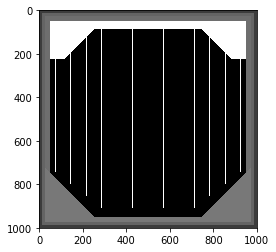

In [9]:
plt.imshow(mask_image)